In [ ]:
from google.colab import files
uploaded = files.upload()


Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [ ]:
import pandas as pd

# Load the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Check general info
train.info()

# Check missing values
print("\nMissing values in train:\n", train.isnull().sum())
print("\nMissing values in test:\n", test.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values in train:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked

In [ ]:
import seaborn as sns


NameError: name 'plt' is not defined

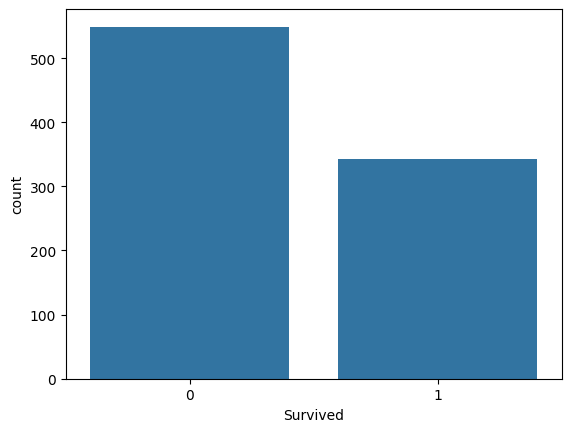

In [ ]:
sns.countplot(x='Survived', data=train)
plt.title('Survival Count')
plt.xticks([0, 1], ['Died 💀', 'Survived 🛟'])
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



In [ ]:
sns.countplot(x='Survived', data=train)
plt.title('Survival Count')
plt.xticks([0, 1], ['Died 💀', 'Survived 🛟'])
plt.show()


In [ ]:
# Save target and PassengerId before merging
train_target = train['Survived']
test_ids = test['PassengerId']

# Drop Survived from train so we can concatenate
train.drop('Survived', axis=1, inplace=True)

# Combine train and test
combined = pd.concat([train, test], sort=False)
combined.reset_index(drop=True, inplace=True)

print("Combined shape:", combined.shape)
combined.head()


In [ ]:
# Save target and PassengerId before merging
train_target = train['Survived']
test_ids = test['PassengerId']

# Drop Survived from train so we can concatenate
train.drop('Survived', axis=1, inplace=True)

# Combine train and test
combined = pd.concat([train, test], sort=False)
combined.reset_index(drop=True, inplace=True)

print("Combined shape:", combined.shape)
combined.head()


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')


In [ ]:
train_target = train['Survived'].copy()
test_ids = test['PassengerId'].copy()


In [ ]:
train = train.drop('Survived', axis=1)


In [ ]:
combined = pd.concat([train, test], sort=False)
combined.reset_index(drop=True, inplace=True)


In [ ]:
combined.drop(['Cabin', 'Ticket'], axis=1, inplace=True)

combined['Age'].fillna(combined['Age'].median(), inplace=True)
combined['Fare'].fillna(combined['Fare'].median(), inplace=True)
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace=True)


In [ ]:
# Drop only if columns exist
combined.drop(columns=[col for col in ['Cabin', 'Ticket'] if col in combined.columns], inplace=True)


In [ ]:
combined['Age'].fillna(combined['Age'].median(), inplace=True)
combined['Fare'].fillna(combined['Fare'].median(), inplace=True)
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace=True)


In [ ]:
# Extract title from Name
combined['Title'] = combined['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Simplify rare titles
combined['Title'] = combined['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combined['Title'] = combined['Title'].replace('Mlle', 'Miss')
combined['Title'] = combined['Title'].replace('Ms', 'Miss')
combined['Title'] = combined['Title'].replace('Mme', 'Mrs')


In [ ]:
combined['Sex'] = combined['Sex'].map({'male': 0, 'female': 1})


In [ ]:
# Create new features
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1
combined['IsAlone'] = 1  # Default = alone

combined['IsAlone'].loc[combined['FamilySize'] > 1] = 0


In [ ]:
# One-hot encode Embarked and Title
combined = pd.get_dummies(combined, columns=['Embarked', 'Title'], drop_first=True)


In [ ]:
combined.drop(['Name', 'PassengerId'], axis=1, inplace=True)


In [ ]:
# Split the combined data back
X_train = combined[:len(train_target)]
X_test = combined[len(train_target):]
y_train = train_target


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# Create model
log_model = LogisticRegression(max_iter=1000)

# Cross-validation
scores = cross_val_score(log_model, X_train, y_train, cv=5)
print("Logistic Regression CV Accuracy:", scores.mean())


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
scores = cross_val_score(rf_model, X_train, y_train, cv=5)
print("Random Forest CV Accuracy:", scores.mean())


In [ ]:
!pip install xgboost


In [ ]:
import pandas as pd
import numpy as np

# Reload the base data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Backup targets
train_target = train['Survived'].copy()
test_ids = test['PassengerId'].copy()
train = train.drop('Survived', axis=1)

# Combine for processing
combined = pd.concat([train, test], sort=False).reset_index(drop=True)


In [ ]:
# Clean missing
combined['Age'].fillna(combined['Age'].median(), inplace=True)
combined['Fare'].fillna(combined['Fare'].median(), inplace=True)
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace=True)


In [ ]:
# Extract Title from Name
combined['Title'] = combined['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
combined['Title'] = combined['Title'].replace(['Lady', 'Countess','Capt', 'Col',
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combined['Title'] = combined['Title'].replace('Mlle', 'Miss')
combined['Title'] = combined['Title'].replace('Ms', 'Miss')
combined['Title'] = combined['Title'].replace('Mme', 'Mrs')

# Encode Sex
combined['Sex'] = combined['Sex'].map({'male': 0, 'female': 1})

# Create FamilySize and IsAlone
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1
combined['IsAlone'] = 0
combined.loc[combined['FamilySize'] == 1, 'IsAlone'] = 1

# Age binning
combined['AgeBin'] = pd.cut(combined['Age'], bins=[0, 10, 18, 25, 40, 60, 120], labels=False)

# Fare binning
combined['FareBin'] = pd.qcut(combined['Fare'], 4, labels=False)

# Interaction Feature
combined['PclassSex'] = combined['Pclass'] * combined['Sex']

# Drop unused
combined.drop(['Name', 'Ticket', 'Cabin', 'Age', 'Fare', 'PassengerId'], axis=1, inplace=True)

# One-hot encode
combined = pd.get_dummies(combined, columns=['Embarked', 'Title'], drop_first=True)


In [ ]:
# Reload clean data again to start fresh
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train_target = train['Survived'].copy()
test_ids = test['PassengerId'].copy()
train = train.drop('Survived', axis=1)

combined = pd.concat([train, test], sort=False).reset_index(drop=True)


In [ ]:
combined['Age'].fillna(combined['Age'].median(), inplace=True)
combined['Fare'].fillna(combined['Fare'].median(), inplace=True)
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace=True)


In [ ]:
# Extract Title from Name
combined['Title'] = combined['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
combined['Title'] = combined['Title'].replace(['Lady', 'Countess','Capt', 'Col',
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combined['Title'] = combined['Title'].replace('Mlle', 'Miss')
combined['Title'] = combined['Title'].replace('Ms', 'Miss')
combined['Title'] = combined['Title'].replace('Mme', 'Mrs')

# Encode Sex
combined['Sex'] = combined['Sex'].map({'male': 0, 'female': 1})

# Create FamilySize and IsAlone
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1
combined['IsAlone'] = 0
combined.loc[combined['FamilySize'] == 1, 'IsAlone'] = 1

# Age binning
combined['AgeBin'] = pd.cut(combined['Age'], bins=[0, 10, 18, 25, 40, 60, 120], labels=False)

# Fare binning
combined['FareBin'] = pd.qcut(combined['Fare'], 4, labels=False)

# Interaction Feature
combined['PclassSex'] = combined['Pclass'] * combined['Sex']

# Drop unused
combined.drop(['Name', 'Ticket', 'Cabin', 'Age', 'Fare', 'PassengerId'], axis=1, inplace=True)

# One-hot encode
combined = pd.get_dummies(combined, columns=['Embarked', 'Title'], drop_first=True)


NameError: name 'combined' is not defined

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving gender_submission.csv to gender_submission (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [ ]:
import pandas as pd
import numpy as np

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Save target and test IDs
train_target = train['Survived']
test_ids = test['PassengerId']

# Drop Survived from train
train.drop('Survived', axis=1, inplace=True)

# Combine train + test
combined = pd.concat([train, test], sort=False).reset_index(drop=True)


In [ ]:
combined['Age'].fillna(combined['Age'].median(), inplace=True)
combined['Fare'].fillna(combined['Fare'].median(), inplace=True)
combined['Embarked'].fillna(combined['Embarked'].mode()[0], inplace=True)


/tmp/ipython-input-9-1840906784.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined['Age'].fillna(combined['Age'].median(), inplace=True)
/tmp/ipython-input-9-1840906784.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [ ]:
# Extract Title
combined['Title'] = combined['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
combined['Title'] = combined['Title'].replace(['Lady', 'Countess','Capt', 'Col',
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combined['Title'] = combined['Title'].replace('Mlle', 'Miss')
combined['Title'] = combined['Title'].replace('Ms', 'Miss')
combined['Title'] = combined['Title'].replace('Mme', 'Mrs')

# Encode Sex
combined['Sex'] = combined['Sex'].map({'male': 0, 'female': 1})

# Family features
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1
combined['IsAlone'] = (combined['FamilySize'] == 1).astype(int)

# Age bins
combined['AgeBin'] = pd.cut(combined['Age'], bins=[0, 10, 18, 25, 40, 60, 120], labels=False)

# Fare bins
combined['FareBin'] = pd.qcut(combined['Fare'], 4, labels=False)

# Interaction feature
combined['PclassSex'] = combined['Pclass'] * combined['Sex']

# One-hot encoding
combined = pd.get_dummies(combined, columns=['Embarked', 'Title'], drop_first=True)

# Drop unused
combined.drop(['Name', 'Ticket', 'Cabin', 'Age', 'Fare', 'PassengerId'], axis=1, inplace=True)


In [ ]:
X_train = combined[:len(train_target)]
X_test = combined[len(train_target):]
y_train = train_target


In [ ]:
!pip install xgboost --quiet

from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score

model = XGBClassifier(
    n_estimators=500,
    max_depth=7,
    learning_rate=0.03,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

scores = cross_val_score(model, X_train, y_train, cv=5)
print("🔥 CV Accuracy (Real Score):", scores.mean())


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:36:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

🔥 CV Accuracy (Real Score): 0.8215742891218379


In [ ]:
from google.colab import files
uploaded = files.upload()



Saving gender_submission.csv to gender_submission (3).csv
Saving test.csv to test (3).csv
Saving train.csv to train (3).csv


In [ ]:
import pandas as pd
import numpy as np

# Load files
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Save targets and IDs
train_target = train['Survived']
test_ids = test['PassengerId']

# Drop target from train
train.drop('Survived', axis=1, inplace=True)

# Combine datasets
combined = pd.concat([train, test], sort=False).reset_index(drop=True)


In [ ]:
# Fix missing values
combined['Age'] = combined['Age'].fillna(combined['Age'].median())
combined['Fare'] = combined['Fare'].fillna(combined['Fare'].median())
combined['Embarked'] = combined['Embarked'].fillna(combined['Embarked'].mode()[0])

# Title feature
combined['Title'] = combined['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
combined['Title'] = combined['Title'].replace(['Lady', 'Countess','Capt', 'Col',
        'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
combined['Title'] = combined['Title'].replace('Mlle', 'Miss')
combined['Title'] = combined['Title'].replace('Ms', 'Miss')
combined['Title'] = combined['Title'].replace('Mme', 'Mrs')

# Encode Sex
combined['Sex'] = combined['Sex'].map({'male': 0, 'female': 1})

# Family size
combined['FamilySize'] = combined['SibSp'] + combined['Parch'] + 1
combined['IsAlone'] = (combined['FamilySize'] == 1).astype(int)

# Binning Age & Fare
combined['AgeBin'] = pd.cut(combined['Age'], bins=[0, 10, 18, 25, 40, 60, 120], labels=False)
combined['FareBin'] = pd.qcut(combined['Fare'], 4, labels=False)

# Interaction feature
combined['PclassSex'] = combined['Pclass'] * combined['Sex']

# Add Deck (extracted from Cabin)
decks = combined['Cabin'].str[0]
decks.fillna('U', inplace=True)
combined['Deck'] = decks

# One-hot encode categorical features
combined = pd.get_dummies(combined, columns=['Embarked', 'Title', 'Deck'], drop_first=True)

# Drop unused
combined.drop(['Name', 'Ticket', 'Cabin', 'Age', 'Fare', 'PassengerId'], axis=1, inplace=True)


In [ ]:
X_train = combined[:len(train_target)]
X_test = combined[len(train_target):]
y_train = train_target


In [ ]:
!pip install xgboost --quiet
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# GridSearchCV for best parameters
params = {
    'n_estimators': [500, 700],
    'max_depth': [5, 6, 7],
    'learning_rate': [0.02, 0.03],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

xgb = XGBClassifier(eval_metric='logloss', random_state=42)
grid = GridSearchCV(xgb, params, cv=5, n_jobs=-1, verbose=1)
grid.fit(X_train, y_train)

print("✅ BEST CV Score:", grid.best_score_)
print("✅ BEST Params:", grid.best_params_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
✅ BEST CV Score: 0.8327788588286987
✅ BEST Params: {'colsample_bytree': 0.8, 'learning_rate': 0.02, 'max_depth': 5, 'n_estimators': 700, 'subsample': 0.8}


In [ ]:
# Final model with best params
best_model = grid.best_estimator_
predictions = best_model.predict(X_test)

# Submission
submission = pd.DataFrame({
    'PassengerId': test_ids,
    'Survived': predictions
})

submission.to_csv('titanic_final_submission.csv', index=False)
print("✅ Submission file saved: titanic_final_submission.csv")


✅ Submission file saved: titanic_final_submission.csv


In [ ]:
from google.colab import files
files.download('titanic_final_submission.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>